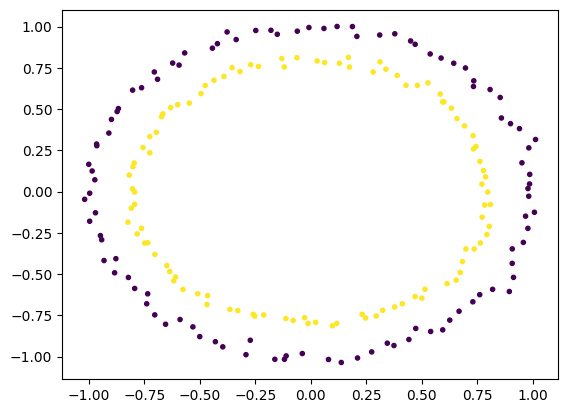

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix, accuracy_score
# Generate dataset and targets
X_train, Y_train = make_circles(n_samples = 200, noise = 0.02)
# visualizing data
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train, marker = '.')
plt.show()

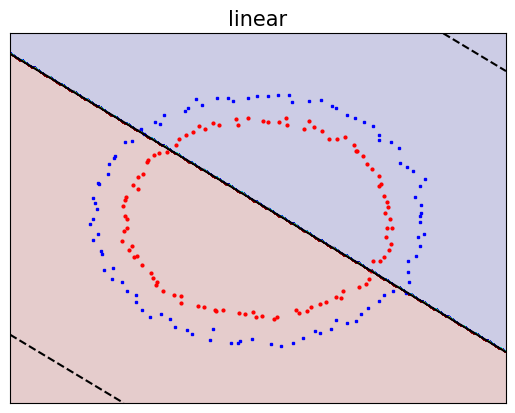

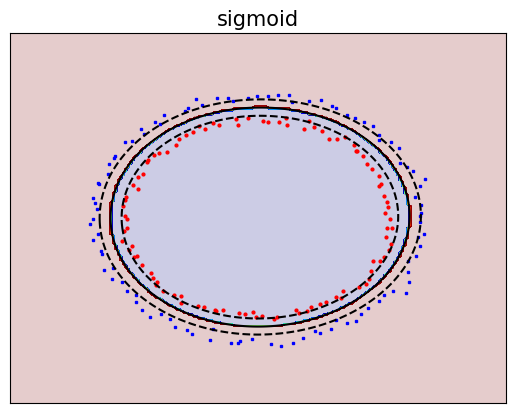

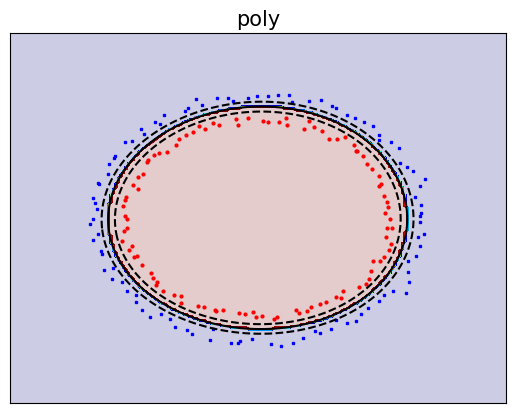

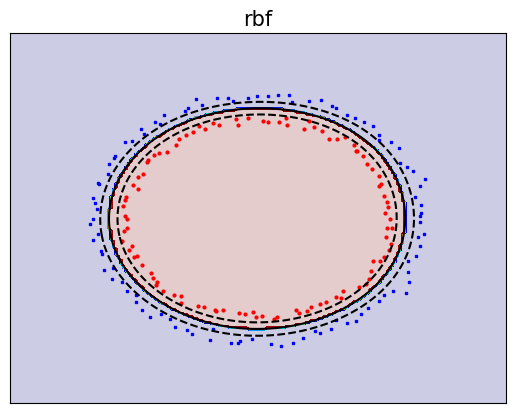

In [2]:
fignum = 1
# fit the model
for kernel in ('linear','sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=1, coef0 = 1)
    clf.fit(X_train, Y_train)
    with PdfPages(kernel + '3.pdf') as pdf:
        # plot the line, the points, and the nearest vectors to the plane
        fig, ax = plt.subplots()
        plt.figure(fignum, figsize=(5, 5))
        plt.clf()
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='None')
        plt.plot(X_train[Y_train==0, 0], X_train[Y_train==0, 1], 'bs', markersize = 2)
        plt.plot(X_train[Y_train==1, 0], X_train[Y_train==1, 1], 'ro', markersize = 2)
        plt.axis('tight')
        x_min = -1.5
        x_max = 1.5
        y_min = -1.5
        y_max = 1.5
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(5, 5))
        CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha = .2)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
        levels=[-.5, 0, .5])
        plt.title(kernel, fontsize = 15)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())

        plt.yticks(())
        fignum = fignum + 1
        pdf.savefig()
plt.show()

In [3]:
#Bai Tap 1
for kernel in ('linear','sigmoid', 'poly', 'rbf'):
    print(kernel)
    clf = svm.SVC(kernel=kernel, gamma=1, coef0 = 1)
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_train)
    print("accuracy_score: ", accuracy_score(Y_train, y_pred))
    print("confusion_matrix: ")
    print(confusion_matrix(Y_train, y_pred))
    print( )
    

linear
accuracy_score:  0.5
confusion_matrix: 
[[46 54]
 [46 54]]

sigmoid
accuracy_score:  0.0
confusion_matrix: 
[[  0 100]
 [100   0]]

poly
accuracy_score:  1.0
confusion_matrix: 
[[100   0]
 [  0 100]]

rbf
accuracy_score:  1.0
confusion_matrix: 
[[100   0]
 [  0 100]]



In [4]:
#Vi du 2
import matplotlib.pyplot as plt
from sklearn import svm
from matplotlib.backends.backend_pdf import PdfPages
# visualizing data
mask = Y == 1
passed = plt.scatter(X[mask][0].values, X[mask][1].values)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()



NameError: name 'Y' is not defined

In [5]:
fignum = 1
# fit the model
for kernel in ('linear','sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=1, coef0 = 1)
    clf.fit(X, Y)
    with PdfPages(kernel + '3.pdf') as pdf:
        # plot the line, the points, and the nearest vectors to the plane
        fig, ax = plt.subplots()
        plt.figure(fignum, figsize=(5, 5))
        plt.clf()
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
        facecolors='None')
        plt.plot(X[mask][0].values, X[mask][1].values, 'bs', markersize = 2)
        plt.plot(X[~mask][0].values, X[~mask][1].values, 'ro', markersize = 2)
        plt.axis('tight')
        x_min = -1.5
        x_max = 1.5
        y_min = -1.5
        y_max = 1.5
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(5, 5))
        CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha = .2)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],

        levels=[-.5, 0, .5])
        plt.title(kernel, fontsize = 15)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1
        pdf.savefig()
plt.show()

NameError: name 'X' is not defined

In [1]:
#Bài tập tự thực hành 1
import scipy.io as sio
from sklearn.svm import SVC
A = sio.loadmat('E:\\Python\\Học Máy\\ARgender.mat')
X_train = A['Y_train'].T
X_test = A['Y_test'].T
print(X_train.shape)
N = 700
y_train = A['label_train'].reshape(N)
y_test = A['label_test'].reshape(N)

(700, 300)


In [2]:
#Bài tập tự thực hành 2
import scipy.io as sio
from sklearn.svm import SVC
A = sio.loadmat('E:\\Python\\Học Máy\\ARgender.mat')
X_train = A['Y_train'].T
X_test = A['Y_test'].T
print(X_train.shape)
N = 700
y_train = A['label_train'].reshape(N)
y_test = A['label_test'].reshape(N)

(700, 300)


In [3]:
#Bài tập tự thực hành 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
# Breast cancer dataset for classification
data = load_breast_cancer()
print (data.feature_names)
print (data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
